# Binary Tree

## Invert a binary tree

Neste desafio você deverá construir uma função que recebe uma árvore binária e inverta seus itens filhos, ou seja, o nó filho da direita do item atual deve ser invertido com o nó filho da esquerda.

Os nós podem ter valores ou até mesmo serem nulos (indicando que não possuem filhos).

Exemplos
Sua função receberá uma árvore binária da seguinte forma:

Exemplo 1

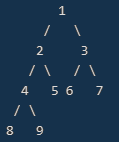

E deverá retornar a árvore binária da seguinte forma:

Exemplo 2

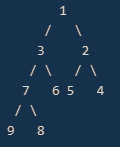


In [ ]:
class Node:
  def __init__(self, value=0, left=None, right=None):
      self.value = value
      self.left = left
      self.right = right


def solution(root):
    print(root.value)
    if root.left is None and root.right is None:
        return root
    root.left, root.right = root.right, root.left
    if root.left:
        solution(root.left)
    if root.right:
        solution(root.right)
    #return root

In [ ]:
node9 = Node(9)
node8 = Node(8)
node7 = Node(7)
node6 = Node(6)
node5 = Node(5)
node4 = Node(4, node8, node9)
node3 = Node(3, node6, node7)
node2 = Node(2, node4, node5)
node1 = Node(1, node2, node3)
solution(node1)

1
3
7
6
2
5
4
9
8


## Minimum Depth of Binary Tree

Dada uma árvore binária, encontre a menor profundidade da mesma.

A profundidade mínima é o número de nós que formam o menor caminho entre a raiz e o nó sem nenhum filho da árvore.

Nota: Um nó considerado sem nenhum filho é aquele em que o left e o right são nulos, ou seja, não tem nenhum filho.

Exemplo:
Dada a árvore binária [3, 9, 20, None, None, 15, 7],

```
  3
 / \
9  20
  /  \
 15   7
```
O resultado é 2 pois o menor caminho passa pelos números 3 e 9.

In [ ]:
def solution(root):
    if not root:
        return 0
    queue = [(root, 1)]
    while queue:
        node, level = queue.pop(0)
        if not node.left and not node.right:
            return level

        level += 1
        if node.left:
            queue.append((node.left, level))

        if node.right:
            queue.append((node.right, level))

    return 0


## Superbalanced Binary Tree

Write a function to see if a binary tree is "superbalanced" (a new tree property we just made up).

A tree is "superbalanced" if the difference between the depths of any two leaf nodes is no greater than one.



In [1]:
def is_balanced(tree_root):

    # Determine if the tree is superbalanced
    if not tree_root:
        raise ValueError('There is no tree.')
    
    depths = []
    queue = [(tree_root, 1)]
    
    while queue:
        node, depth = queue.pop(0)
        
        if (not node.right) and (not node.left):
            if depth not in depths:
                depths.append(depth)
                # check if is not superbalanced
                if ((len(depths) > 2) or
                        (len(depths) == 2 and
                            abs(depths[0] - depths[1]) > 1)):
                    return False
                continue
        
        depth += 1
        if node.left:
            queue.append((node.left, depth))
            
        if node.right:
            queue.append((node.right, depth))

    return True


In [4]:
import unittest

class Test(unittest.TestCase):

    class BinaryTreeNode(object):

        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

        def insert_left(self, value):
            self.left = Test.BinaryTreeNode(value)
            return self.left

        def insert_right(self, value):
            self.right = Test.BinaryTreeNode(value)
            return self.right

    def test_full_tree(self):
        tree = Test.BinaryTreeNode(5)
        left = tree.insert_left(8)
        right = tree.insert_right(6)
        left.insert_left(1)
        left.insert_right(2)
        right.insert_left(3)
        right.insert_right(4)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_both_leaves_at_the_same_depth(self):
        tree = Test.BinaryTreeNode(3)
        left = tree.insert_left(4)
        right = tree.insert_right(2)
        left.insert_left(1)
        right.insert_right(9)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_leaf_heights_differ_by_one(self):
        tree = Test.BinaryTreeNode(6)
        left = tree.insert_left(1)
        right = tree.insert_right(0)
        right.insert_right(7)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_leaf_heights_differ_by_two(self):
        tree = Test.BinaryTreeNode(6)
        left = tree.insert_left(1)
        right = tree.insert_right(0)
        right_right = right.insert_right(7)
        right_right.insert_right(8)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_three_leaves_total(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(5)
        right = tree.insert_right(9)
        right.insert_left(8)
        right.insert_right(5)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_both_subtrees_superbalanced(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(5)
        right = tree.insert_right(9)
        right_left = right.insert_left(8)
        right.insert_right(5)
        right_left.insert_left(7)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_both_subtrees_superbalanced_two(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(2)
        right = tree.insert_right(4)
        left.insert_left(3)
        left_right = left.insert_right(7)
        left_right.insert_right(8)
        right_right = right.insert_right(5)
        right_right_right = right_right.insert_right(6)
        right_right_right.insert_right(9)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_three_leaves_at_different_levels(self):
        tree = Test.BinaryTreeNode(1)
        left = tree.insert_left(2)
        left_left = left.insert_left(3)
        left.insert_right(4)
        left_left.insert_left(5)
        left_left.insert_right(6)
        right = tree.insert_right(7)
        right_right = right.insert_right(8)
        right_right_right = right_right.insert_right(9)
        right_right_right.insert_right(10)
        result = is_balanced(tree)
        self.assertFalse(result)

    def test_only_one_node(self):
        tree = Test.BinaryTreeNode(1)
        result = is_balanced(tree)
        self.assertTrue(result)

    def test_linked_list_tree(self):
        tree = Test.BinaryTreeNode(1)
        right = tree.insert_right(2)
        right_right = right.insert_right(3)
        right_right.insert_right(4)
        result = is_balanced(tree)
        self.assertTrue(result)


unittest.main(argv=[''], verbosity=2, exit=False)
print()

test_both_leaves_at_the_same_depth (__main__.Test) ... ok
test_both_subtrees_superbalanced (__main__.Test) ... ok
test_both_subtrees_superbalanced_two (__main__.Test) ... ok
test_full_tree (__main__.Test) ... ok
test_leaf_heights_differ_by_one (__main__.Test) ... ok
test_leaf_heights_differ_by_two (__main__.Test) ... ok
test_linked_list_tree (__main__.Test) ... ok
test_only_one_node (__main__.Test) ... ok
test_three_leaves_at_different_levels (__main__.Test) ... ok
test_three_leaves_total (__main__.Test) ... 

ok

----------------------------------------------------------------------
Ran 10 tests in 0.022s

OK


# Depth First Search

## Longest Increasing Path in a Matrix

Dada uma matriz de inteiros, busque o tamanho do maior caminho em que os valores são incrementais.

Para cada célula, mova-se em quatro diferentes direções: esquerda, direita, para cima e para baixo. Você não poderá se mover diagonalmente ou para fora da matriz!

---

Exemplo 1:

Entrada: 
```
nums = [
    [9, 9, 4],
    [6, 6, 8],
    [2, 1, 1]
]
```
Saída: 4

Explicação: O maior caminho em que os valores são incrementais é `[1, 2, 6, 9]`

---

Exemplo 2:

Entrada:
``` 
nums = [
    [3, 4, 5],
    [3, 2, 6],
    [2, 2, 1]
]
```
Saída: 4

Explicação: O maior caminho em que os valores são incrementais é `[3, 4, 5, 6]`

In [ ]:
def solution(matrix):
    result = 0
    if not matrix or not matrix[0]:
        return result

    def is_valid_position(outer, inner, value):
        if (outer >= 0 and outer < vertical_size
                and inner >= 0 and inner < horizontal_size):
            return value < matrix[outer][inner]

    def depth_first_search(outer, inner):
        if count_matrix[outer][inner] != 0:
            return count_matrix[outer][inner]
        
        value = matrix[outer][inner]
        max_path = 0
        for next_outer, next_inner in [(outer + 1, inner), (outer - 1, inner),
                                       (outer, inner + 1), (outer, inner - 1)]:
            if is_valid_position(next_outer, next_inner, value):
                max_path = max(max_path, depth_first_search(next_outer, next_inner))
        count_matrix[outer][inner] = 1 + max_path

        return count_matrix[outer][inner]


    vertical_size, horizontal_size = len(matrix), len(matrix[0])
    count_matrix = [[0] * horizontal_size for _ in range(vertical_size)]

    for m in range(vertical_size):
        for n in range(horizontal_size):
            result = max(result, depth_first_search(m, n))
    return result


# Dynamic Programming

## Fibonacci

Write a function fib() that takes an integer n and returns the nth Fibonacci number.

Let's say our Fibonacci series is 0-indexed and starts with 0.

In [ ]:
def fib(n):

    # Compute the nth Fibonacci number
    if n < 0:
        raise ValueError('Index was negative.')
        
    elif n in [1, 0]:
        return n
        
    
    prev_prev = 0
    prev = 1
    
    for _ in range(n-1):
        current = prev + prev_prev
        prev_prev = prev
        prev = current

    return current


In [ ]:
import unittest


class Test(unittest.TestCase):

    def test_zeroth_fibonacci(self):
        actual = fib(0)
        expected = 0
        self.assertEqual(actual, expected)

    def test_first_fibonacci(self):
        actual = fib(1)
        expected = 1
        self.assertEqual(actual, expected)

    def test_second_fibonacci(self):
        actual = fib(2)
        expected = 1
        self.assertEqual(actual, expected)

    def test_third_fibonacci(self):
        actual = fib(3)
        expected = 2
        self.assertEqual(actual, expected)

    def test_fifth_fibonacci(self):
        actual = fib(5)
        expected = 5
        self.assertEqual(actual, expected)

    def test_tenth_fibonacci(self):
        actual = fib(10)
        expected = 55
        self.assertEqual(actual, expected)

    def test_negative_fibonacci(self):
        with self.assertRaises(Exception):
            fib(-1)


unittest.main(argv=[''], verbosity=2, exit=False)
print()

test_fifth_fibonacci (__main__.Test) ... ok
test_first_fibonacci (__main__.Test) ... ok
test_negative_fibonacci (__main__.Test) ... ok
test_second_fibonacci (__main__.Test) ... ok
test_tenth_fibonacci (__main__.Test) ... ok
test_third_fibonacci (__main__.Test) ... ok
test_zeroth_fibonacci (__main__.Test) ... 

ok

----------------------------------------------------------------------
Ran 7 tests in 0.024s

OK
